In [ ]:
graph = {
    'A':['B','C'],
    'B':['D','E'],
    'C':['F'],
    'D':[],
    'E':['F'],
    'F':[]
}
visited = [] # List to keep track of visited nodes.
queue = [] #Initialize a queue
def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0)
    print (s, end = " ")

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
        # Driver Code
bfs(visited, graph, 'A')
# Using a Python dictionary to act as an adjacency list
graph = {
    'A' : ['B','C'],
    'B' : ['D', 'E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}

visited = set() # Set to keep track of visited nodes.

def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
dfs(visited, graph, 'A')

A B C D E F A
B
D
E
F
C


In [ ]:
# program to implement traveling salesman
# problem using naive approach.
from sys import maxsize
from itertools import permutations
V = 4
# implementation of traveling Salesman Problem
def travellingSalesmanProblem(graph, s):
  # store all vertex apart from source vertex
  vertex = []
  for i in range(V):
    if i != s:
      vertex.append(i)
      # store minimum weight
      min_path = maxsize
      next_permutation=permutations(vertex)
      for i in next_permutation:
        # store current Path weight(cost)
        current_pathweight = 0
        # compute current path weight
        k = s
        for j in i:
          current_pathweight += graph[k][j]
          k = j
          current_pathweight += graph[k][s]
          # update minimum
          min_path = min(min_path, current_pathweight)
  return min_path
# Driver Code
if __name__ == "__main__":
  # matrix representation of graph
  graph = [[0, 10, 15, 20], [10, 0, 35, 25],[15, 35, 0, 30], [20, 25, 30, 0]]
  s = 0
  print(travellingSalesmanProblem(graph, s))


20


>34 f([-0.78753544]) = 0.62021
>35 f([-0.76914239]) = 0.59158
>37 f([-0.68574854]) = 0.47025
>39 f([-0.64797564]) = 0.41987
>40 f([-0.58914623]) = 0.34709
>41 f([-0.55446029]) = 0.30743
>42 f([-0.41775702]) = 0.17452
>43 f([-0.35038542]) = 0.12277
>50 f([-0.15799045]) = 0.02496
>66 f([-0.11089772]) = 0.01230
>67 f([-0.09238208]) = 0.00853
>72 f([-0.09145261]) = 0.00836
>75 f([-0.05129162]) = 0.00263
>93 f([-0.02854417]) = 0.00081
>144 f([0.00864136]) = 0.00007
>149 f([0.00753953]) = 0.00006
>167 f([-0.00640394]) = 0.00004
>225 f([-0.00044965]) = 0.00000
>503 f([-0.00036261]) = 0.00000
>512 f([0.00013605]) = 0.00000
Done!
f([0.00013605]) = 0.000000


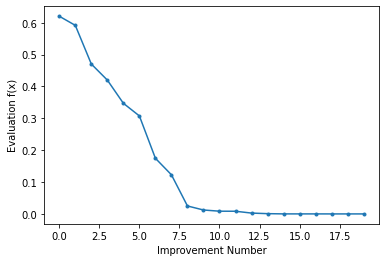

In [ ]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# objective function
def objective(x):
	return x[0]**2.0

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generate an initial point
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial
	best_eval = objective(best)
	# current working solution
	curr, curr_eval = best, best_eval
	scores = list()
	# run the algorithm
	for i in range(n_iterations):
		# take a step
		candidate = curr + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidate_eval = objective(candidate)
		# check for new best solution
		if candidate_eval < best_eval:
			# store new best point
			best, best_eval = candidate, candidate_eval
			# keep track of scores
			scores.append(best_eval)
			# report progress
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
		t = temp / float(i + 1)
		# calculate metropolis acceptance criterion
		metropolis = exp(-diff / t)
		# check if we should keep the new point
		if diff < 0 or rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval, scores]

# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))
# line plot of best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()


In [ ]:
class Agent:
    def __init__(self):
        self.__wumpusWorld = [
                 ['','','P',''], # Rooms [1,1] to [4,1]
                 ['','','',''], # Rooms [1,2] to [4,2]
                 ['W','','',''], # Rooms [1,3] to [4,3]
                 ['','','',''],  # Rooms [1,4] to [4,4]
                ] # This is the wumpus world shown in the assignment question.
                  # A different instance of the wumpus world will be used for evaluation.
        self.__curLoc = [1,1]
        self.__isAlive = True
        self.__hasExited = False

    def __FindIndicesForLocation(self,loc):
        x,y = loc
        i,j = y-1, x-1
        return i,j

    def __CheckForPitWumpus(self):
        ww = self.__wumpusWorld
        i,j = self.__FindIndicesForLocation(self.__curLoc)
        if 'P' in ww[i][j] or 'W' in ww[i][j]:
            print(ww[i][j])
            self.__isAlive = False
            print('Agent is DEAD.')
        return self.__isAlive

    def TakeAction(self,action): # The function takes an action and returns whether the Agent is alive
                                # after taking the action.
        validActions = ['Up','Down','Left','Right']
        assert action in validActions, 'Invalid Action.'
        if self.__isAlive == False:
            print('Action cannot be performed. Agent is DEAD. Location:{0}'.format(self.__curLoc))
            return False
        if self.__hasExited == True:
            print('Action cannot be performed. Agent has exited the Wumpus world.'.format(self.__curLoc))
            return False

        index = validActions.index(action)
        validMoves = [[0,1],[0,-1],[-1,0],[1,0]]
        move = validMoves[index]
        newLoc = []
        for v, inc in zip(self.__curLoc,move):
            z = v + inc #increment location index
            z = 4 if z>4 else 1 if z<1 else z #Ensure that index is between 1 and 4
            newLoc.append(z)
        self.__curLoc = newLoc
        print('Action Taken: {0}, Current Location {1}'.format(action,self.__curLoc))
        if self.__curLoc[0]==4 and self.__curLoc[1]==4:
            self.__hasExited=True
        return self.__CheckForPitWumpus()

    def __FindAdjacentRooms(self):
        cLoc = self.__curLoc
        validMoves = [[0,1],[0,-1],[-1,0],[1,0]]
        adjRooms = []
        for vM in validMoves:
            room = []
            valid = True
            for v, inc in zip(cLoc,vM):
                z = v + inc
                if z<1 or z>4:
                    valid = False
                    break
                else:
                    room.append(z)
            if valid==True:
                adjRooms.append(room)
        return adjRooms


    def PerceiveCurrentLocation(self): #This function perceives the current location.
                                        #It tells whether breeze and stench are present in the current location.
        breeze, stench = False, False
        ww = self.__wumpusWorld
        if self.__isAlive == False:
            print('Agent cannot perceive. Agent is DEAD. Location:{0}'.format(self.__curLoc))
            return [None,None]
        if self.__hasExited == True:
            print('Agent cannot perceive. Agent has exited the Wumpus World.'.format(self.__curLoc))
            return [None,None]

        adjRooms = self.__FindAdjacentRooms()
        for room in adjRooms:
            i,j = self.__FindIndicesForLocation(room)
            if 'P' in ww[i][j]:
                breeze = True
            if 'W' in ww[i][j]:
                stench = True
        return [breeze,stench]

    def FindCurrentLocation(self):
        return self.__curLoc

def main():
    ag = Agent()
    print('curLoc',ag.FindCurrentLocation())
    print('Percept [breeze, stench] :',ag.PerceiveCurrentLocation())
    ag.TakeAction('Right')
    print('Percept',ag.PerceiveCurrentLocation())
    ag.TakeAction('Right')
    print('Percept',ag.PerceiveCurrentLocation())
    ag.TakeAction('Right')
    print('Percept',ag.PerceiveCurrentLocation())
    ag.TakeAction('Up')
    print('Percept',ag.PerceiveCurrentLocation())
    ag.TakeAction('Up')
    print('Percept',ag.PerceiveCurrentLocation())
    ag.TakeAction('Up')
    print('Percept',ag.PerceiveCurrentLocation())


if __name__=='__main__':
    main()


curLoc [1, 1]
Percept [breeze, stench] : [False, False]
Action Taken: Right, Current Location [2, 1]
Percept [True, False]
Action Taken: Right, Current Location [3, 1]
P
Agent is DEAD.
Agent cannot perceive. Agent is DEAD. Location:[3, 1]
Percept [None, None]
Action cannot be performed. Agent is DEAD. Location:[3, 1]
Agent cannot perceive. Agent is DEAD. Location:[3, 1]
Percept [None, None]
Action cannot be performed. Agent is DEAD. Location:[3, 1]
Agent cannot perceive. Agent is DEAD. Location:[3, 1]
Percept [None, None]
Action cannot be performed. Agent is DEAD. Location:[3, 1]
Agent cannot perceive. Agent is DEAD. Location:[3, 1]
Percept [None, None]
Action cannot be performed. Agent is DEAD. Location:[3, 1]
Agent cannot perceive. Agent is DEAD. Location:[3, 1]
Percept [None, None]


In [ ]:
class Solution:
   def solve(self, board):
      dict = {}
      flatten = []
      for i in range(len(board)):
         flatten += board[i]
      flatten = tuple(flatten)

      dict[flatten] = 0

      if flatten == (0, 1, 2, 3, 4, 5, 6, 7, 8):
         return 0

      return self.get_paths(dict)

   def get_paths(self, dict):
      cnt = 0
      while True:
         current_nodes = [x for x in dict if dict[x] == cnt]
         if len(current_nodes) == 0:
            return -1

         for node in current_nodes:
            next_moves = self.find_next(node)
            for move in next_moves:
               if move not in dict:
                  dict[move] = cnt + 1
               if move == (0, 1, 2, 3, 4, 5, 6, 7, 8):
                  return cnt + 1
         cnt += 1

   def find_next(self, node):
      moves = {
         0: [1, 3],
         1: [0, 2, 4],
         2: [1, 5],
         3: [0, 4, 6],
         4: [1, 3, 5, 7],
         5: [2, 4, 8],
         6: [3, 7],
         7: [4, 6, 8],
         8: [5, 7],
      }

      results = []
      pos_0 = node.index(0)
      for move in moves[pos_0]:
         new_node = list(node)
         new_node[move], new_node[pos_0] = new_node[pos_0], new_node[move]
         results.append(tuple(new_node))

      return results
ob = Solution()
matrix = [
   [3, 1, 2],
   [4, 7, 5],
   [6, 8, 0]
]
print(ob.solve(matrix))


4


In [ ]:
# Creating a recursive function
def tower_of_hanoi(disks, source, auxiliary, target):
    if(disks == 1):
        print('Move disk 1 from rod {} to rod {}.'.format(source, target))
        return
    # function call itself
    tower_of_hanoi(disks - 1, source, target, auxiliary)
    print('Move disk {} from rod {} to rod {}.'.format(disks, source, target))
    tower_of_hanoi(disks - 1, auxiliary, source, target)


disks = int(input('Enter the number of disks: '))
# We are referring source as A, auxiliary as B, and target as C
tower_of_hanoi(disks, 'A', 'B', 'C')  # Calling the function


Enter the number of disks: 3
Move disk 1 from rod A to rod C.
Move disk 2 from rod A to rod B.
Move disk 1 from rod C to rod B.
Move disk 3 from rod A to rod C.
Move disk 1 from rod B to rod A.
Move disk 2 from rod B to rod C.
Move disk 1 from rod A to rod C.


In [ ]:
class Node():
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0
    def __eq__(self, other):
        return self.position == other.position
def astar(maze, start, end):
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0
    open_list = []
    closed_list = []
    open_list.append(start_node)
    while len(open_list) > 0:
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        open_list.pop(current_index)
        closed_list.append(current_node)
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1]
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (
                    len(maze[len(maze) - 1]) - 1) or node_position[1] < 0:
                continue
            if maze[node_position[0]][node_position[1]] != 0:
                continue
            new_node = Node(current_node, node_position)
            children.append(new_node)
        for child in children:
            for closed_child in closed_list:
                if child == closed_child:
                    continue
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + (
                    (child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue
            open_list.append(child)
def main():
    maze = [[0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0]]
    graph = [[0, 1, 0, 0, 0, 0],
             [1, 0, 1, 0, 1, 0],
             [0, 1, 0, 0, 0, 1],
             [0, 0, 0, 0, 1, 0],
             [0, 1, 0, 1, 0, 0],
             [0, 0, 1, 0, 0, 0]
             ]
    start = (0, 0)
    end = (5, 5)
    end1 = (5, 5)
    path = astar(maze, start, end)
    print(path)
    path1 = astar(graph, start, end1)
    print(path1)
if __name__ == '__main__':
    main()

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (5, 5)]
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]


>1 f([-2.74290923]) = 7.52355
>3 f([-2.65873147]) = 7.06885
>4 f([-2.52197291]) = 6.36035
>5 f([-2.46450214]) = 6.07377
>7 f([-2.44740961]) = 5.98981
>9 f([-2.28364676]) = 5.21504
>12 f([-2.19245939]) = 4.80688
>14 f([-2.01001538]) = 4.04016
>15 f([-1.86425287]) = 3.47544
>22 f([-1.79913002]) = 3.23687
>24 f([-1.57525573]) = 2.48143
>25 f([-1.55047719]) = 2.40398
>26 f([-1.51783757]) = 2.30383
>27 f([-1.49118756]) = 2.22364
>28 f([-1.45344116]) = 2.11249
>30 f([-1.33055275]) = 1.77037
>32 f([-1.17805016]) = 1.38780
>33 f([-1.15189314]) = 1.32686
>36 f([-1.03852644]) = 1.07854
>37 f([-0.99135322]) = 0.98278
>38 f([-0.79448984]) = 0.63121
>39 f([-0.69837955]) = 0.48773
>42 f([-0.69317313]) = 0.48049
>46 f([-0.61801423]) = 0.38194
>48 f([-0.48799625]) = 0.23814
>50 f([-0.22149135]) = 0.04906
>54 f([-0.20017144]) = 0.04007
>57 f([-0.15994446]) = 0.02558
>60 f([-0.15492485]) = 0.02400
>61 f([-0.03572481]) = 0.00128
>64 f([-0.03051261]) = 0.00093
>66 f([-0.0074283]) = 0.00006
>78 f([-0.00202

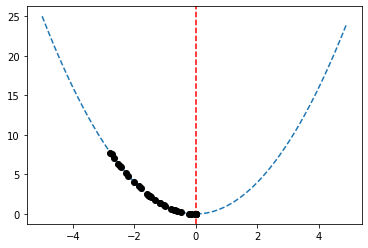

In [ ]:
# hill climbing search of a one-dimensional objective function
from numpy import asarray
from numpy import arange
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

# objective function
def objective(x):
	return x[0]**2.0

# hill climbing local search algorithm
def hillclimbing(objective, bounds, n_iterations, step_size):
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	solution_eval = objective(solution)
	# run the hill climb
	solutions = list()
	solutions.append(solution)
	for i in range(n_iterations):
		# take a step
		candidate = solution + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidte_eval = objective(candidate)
		# check if we should keep the new point
		if candidte_eval <= solution_eval:
			# store the new point
			solution, solution_eval = candidate, candidte_eval
			# keep track of solutions
			solutions.append(solution)
			# report progress
			print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval, solutions]

# seed the pseudorandom number generator
seed(5)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# perform the hill climbing search
best, score, solutions = hillclimbing(objective, bounds, n_iterations, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1], 0.1)
# create a line plot of input vs result
pyplot.plot(inputs, [objective([x]) for x in inputs], '--')
# draw a vertical line at the optimal input
pyplot.axvline(x=[0.0], ls='--', color='red')
# plot the sample as black circles
pyplot.plot(solutions, [objective(x) for x in solutions], 'o', color='black')
pyplot.show()


In [ ]:
print("Simple Question and Answering Program")
print("=====================================")
print(" You may ask any one of these questions")
print("Hi")
print("How are you?")
print("Are you working?")
print("What is your name?")
print("what did you do yesterday?")
print("Quit")
while True:
    question = input("Enter one question from above list:")
    question = question.lower()
    if question in ['hi']:
        print("Hello")
    elif question in ['how are you?','how do you do?']:
        print("I am fine")
    elif question in ['are you working?','are you doing any job?']:
        print("yes. I'am working in KLU")
    elif question in ['what is your name?']:
        print("My name is Emilia")
        name=input("Enter your name?")
        print("Nice name and Nice meeting you",name)
    elif question in ['what did you do yesterday?']:
        print("I saw Bahubali 5 times")
    elif question in ['quit']:
        break
    else:
        print("I don't understand what you said")


Simple Question and Answering Program
 You may ask any one of these questions
Hi
How are you?
Are you working?
What is your name?
what did you do yesterday?
Quit
Enter one question from above list:Hi
Hello
Enter one question from above list:How are you?
I am fine
Enter one question from above list:Are you working?
yes. I'am working in KLU
Enter one question from above list:What is your name?
My name is Emilia
Enter your name?Gulnaaz
Nice name and Nice meeting you Gulnaaz
Enter one question from above list:what did you do yesterday?
I saw Bahubali 5 times
Enter one question from above list:lol
I don't understand what you said
Enter one question from above list:Quit


In [ ]:
# Recursive function to find the
# number of times the second string
# occurs in the first string
def count(a, b, m, n):
 # If both first and second string
 # is empty, or if second string
 # is empty, return 1
 if ((m == 0 and n == 0) or n == 0):
  return 1
 # If only first string is empty
 # and second string is not empty,
 # return 0
 if (m == 0):
  return 0
 # If last characters are same
 # Recur for remaining strings by
 # 1. considering last characters
 # of both strings
 # 2. ignoring last character
 # of first string
 if (a[m - 1] == b[n - 1]):
  return (count(a, b, m - 1, n - 1) +
 count(a, b, m - 1, n))
 else:

 # If last characters are different,
 # ignore last char of first string
 # and recur for remaining string
  return count(a, b, m - 1, n)
# Driver code
a = "GeeksforGeeks"
b = "Gks"
print(count(a, b, len(a),len(b)))

4
